In [1]:
#Load Data
import pandas as pd
import numpy as np
import os 
#a_food, b_cloth, c_education, d_store, e_lifeservice, 
#f_cafe, g_accommodation, h_leisure, i_estaet
file_list=['a_food','b_cloth','c_education','d_store','e_lifeservice','f_cafe','g_accommodation','h_leisure','i_estate']

dir_name=os.getcwd()

x_data=[]
y_data=[]
#label value : food-0, cloth-1, education-2,.... estate-8
for i in range(0,len(file_list)) :
  file_name=dir_name+'/'+file_list[i]+'.csv'
  data=pd.read_csv(file_name,header=None)
  #print(data.head())
  print(data.shape)
  #print('..'+data[0][0])
  for j in range(0,2000) :
    #print(data[0][j])
    x_data.append(data[0][j])
    y_data.append(i)

x_data=np.array(x_data)
y_data=np.array(y_data)
print(x_data.shape)
print(y_data.shape)  

(8375, 1)
(8381, 1)
(2915, 1)
(7972, 1)
(6639, 1)
(4274, 1)
(3784, 1)
(2598, 1)
(4790, 1)
(18000,)
(18000,)


In [2]:
#Pre-processing 
#문장 토큰화, 데이터 패딩, 임베딩(단어->정수값부여->임베딩층통과->벡터화)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

#문장 토큰화
t=Tokenizer()
t.fit_on_texts(x_data)
vocab_size=len(t.word_index)+1

print(vocab_size) #9976개의 단어가 9천개의 문장에 포함

#정수 인코딩
x_encoded=t.texts_to_sequences(x_data)
print(x_encoded[0:5])
max_len=max(len(i) for i in x_encoded) 
print(max_len) #제일 긴 문장 추출, 패딩에 사용 -- 20

#모든 문장을 패딩 (길이 통일), 후에 모델 학습시 사용
x_encoded=pad_sequences(x_encoded,maxlen=max_len,padding='post')
print(x_encoded[0:5])



16216
[[23, 498], [5830, 19, 38, 1, 41, 364, 853, 1], [3663, 415, 46, 5831, 853, 723, 18], [3663, 2076, 946, 671, 193, 1729, 127, 1459], [5832, 5833, 557, 365]]
30
[[  23  498    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [5830   19   38    1   41  364  853    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [3663  415   46 5831  853  723   18    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [3663 2076  946  671  193 1729  127 1459    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [5832 5833  557  365    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]


In [3]:
#Use Pre-trained Embedding Matrix - Word2Vec https://github.com/Kyubyong/wordvectors
import gensim
import numpy as np

def get_vector(word) :
  if word in kor_word2vec_model :
    return kor_word2vec_model[word]
  else :
    return None

kor_word2vec_model = gensim.models.Word2Vec.load(dir_name+'/ko.bin')
result = kor_word2vec_model.wv.most_similar("배고픔") #model test
print(result) 
print(kor_word2vec_model) #vector_size=200

embedding_dim=200
embedding_matrix=np.zeros((vocab_size,embedding_dim))
print(np.shape(embedding_matrix))
for word, i in t.word_index.items(): 
  temp=get_vector(word)
  if temp is not None :
    embedding_matrix[i]=temp; 

print(embedding_matrix[5])
print(embedding_matrix.shape)



[('굶주림', 0.7315763235092163), ('갈증', 0.6932728290557861), ('우울증', 0.6545943021774292), ('두통', 0.6426253318786621), ('슬픔', 0.6376044154167175), ('고통', 0.6278344988822937), ('죄책감', 0.6167707443237305), ('고독', 0.6096115708351135), ('통증', 0.6073928475379944), ('가뭄', 0.5912175178527832)]
Word2Vec(vocab=30185, size=200, alpha=0.025)
(16216, 200)
[ 0.87955445  3.51403809 -3.24564695 -0.44390556  1.65877819  2.79138994
 -2.38859749 -1.69410491 -4.66581869 -1.40278232  0.52966899  2.38166356
  1.86097968 -0.2121693   1.29480684  1.340168    1.33980846  0.65593433
 -3.97182965 -1.87287378 -2.31968427 -0.36057377  1.96739149  2.63297033
  3.62644196 -2.02101588 -2.54353046 -3.30448771 -1.73401546  0.10235422
  2.16407609 -0.26688221 -1.28560567 -1.07995558 -0.43422294 -1.18709815
  2.49914885 -2.92724586  2.0472517   3.16466165 -1.0194726  -0.43097895
  0.96997708  2.60468745  0.87658358 -0.95602894  2.89103341 -0.47456264
  0.29335284 -3.18679857 -1.16479719  0.40571555 -2.49110079 -0.73088485
 

<ipython-input-3-35cf70871181>:11: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if word in kor_word2vec_model :
<ipython-input-3-35cf70871181>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return kor_word2vec_model[word]


In [4]:
#Split Data
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#ID = 0,1,2,3,4,5  OOD = 6,7,8,
#Train = id sentence * 0.8 
#Test = id sentecne * 0.2 + OOD sentence
#for categorycal_cee label데이터 변환
categorical_y = to_categorical(y_data, 9)

id_data=[]
id_label=[]
ood_data=[]
ood_label=[]
for i in range(0,len(x_encoded)) :
    if y_data[i] < 6 :
        id_data.append(x_encoded[i])
        id_label.append(categorical_y[i])
    else :
        ood_data.append(x_encoded[i])
        ood_label.append(categorical_y[i])

#id_label=to_categorical(id_label,6)
#ood_label=to_categorical(ood_label,3)

x_train, x_test, y_train, y_test = train_test_split(id_data,id_label,
                                                    test_size=0.2,stratify=id_label,random_state=0)


for i in range(0,len(ood_data)) :
    x_test.append(ood_data[i])
    y_test.append(ood_label[i])
    
print(len(x_train),len(x_test))

x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(x_train[:3])
print(y_train[:3])

9600 8400
(9600, 30) (9600, 9)
(8400, 30) (8400, 9)
[[ 369 6636 6637  393 6638  484  114   52  106   34   18    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 765 9241 1603 9242    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]]


Bi-LSTM NetWork
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 200)      3243200     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 30, 200)      3243200     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 30, 200)      0           embedding[0][0]                  
______________________________________________________________________________

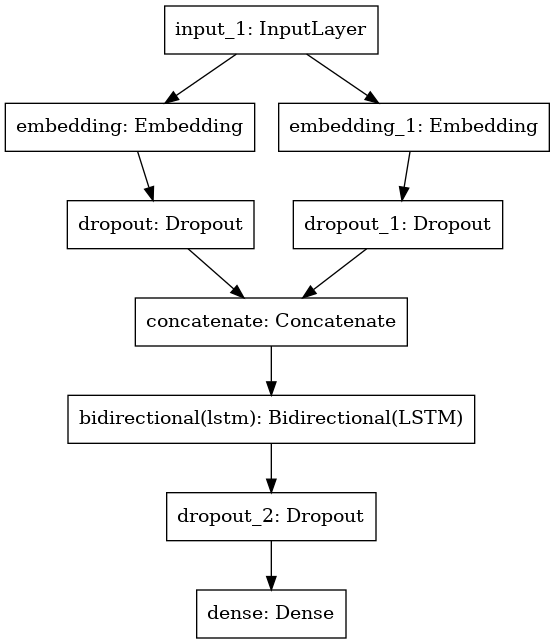

In [5]:
#GPU 셋팅
import tensorflow as tf

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
session=tf.compat.v1.Session(config=config)

config = tf.compat.v1.ConfigProto() 
config.gpu_options.per_process_gpu_memory_fraction = 0.3 
session=tf.compat.v1.Session(config=config)

#Bi-LSTM Network
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import concatenate, Embedding, Input, LSTM, Dropout, Bidirectional,Dense
import keras.utils as utils
#model_input=Input(shape=(max_len,))
#embedding_layer=Embedding(vocab_size,embedding_dim,weights=[embedding_matrix],
#                          input_length=max_len,trainable=False)(model_input)

main_input=Input(shape=(30,))
non_static_channel=Embedding(vocab_size,embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=True)(main_input)
non_static_channel=Dropout(0.5)(non_static_channel)

static_channel=Embedding(vocab_size,embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_len,
                            trainable=False)(main_input)
static_channel=Dropout(0.5)(static_channel)

two_channel=concatenate([non_static_channel,static_channel])

bi_lstm=Bidirectional(LSTM(embedding_dim,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False))(two_channel)

drop_out=Dropout(0.5)(bi_lstm)

dc=Dense(9,activation='softmax')(drop_out)

model=Model(inputs=main_input,outputs=dc)

# model=Sequential()
# # model.add(Embedding(vocab_size,
# #                     embedding_dim,
# #                     weights=[embedding_matrix],
# #                           input_length=max_len,
# #                     trainable=True)) #embedding layer에 대해 학습은 하면안됨 word2vec용임

# #한국어 특성상 말을 끝까지 들어봐야하므로 뒤에말이 중요할떄가 많음. bi-directional사용으로서 이를해결
# #현재 값을 안준상태이므로 forward_layer=backward_layer인상황
# # forward_layer=LSTM(100,activation='tanh',recurrent_activation='sigmoid',
# #                    return_state=False,return_sequences=False)
# # backward_layer=LSTM(150,activation='tanh',recurrent_activation='sigmoid',
# #                     return_state=False,return_sequences=False,go_backwards=True)
# # model.add(Bidirectional(forward_layer,backward_layer=backward_layer))

# model.add(Bidirectional(LSTM(embedding_dim,activation='tanh',
#                              recurrent_activation='sigmoid',
#                              return_state=False,
#                              return_sequences=False)))
# # model.add((LSTM(embedding_dim,activation='tanh', #relu로 할시 정확도가 에포크마다 초기화된다..
# #                              recurrent_activation='sigmoid',
# #                              return_state=False,
# #                              return_sequences=False)))

# #lstm네트워크에 나온 특징들이 dense레이어를 한번 거치면서 의미소실 되는거 같다. 정확도가 더 낮아진다.
# #model.add(Dense(embedding_dim,activation='relu'))

# #카테고리 분류를 위한 denselayer밑 softmax함수 
# model.add(Dense(9, activation='softmax'))


#분류문제를 위한 categorical cee사용
model.compile(optimizer='adam',                        
              loss='categorical_crossentropy',  #sparse_categorical_crossentropy
              metrics=['accuracy']) 

print('Bi-LSTM NetWork')
model.summary()
utils.plot_model(model)


In [6]:
#Excute Bi-LSTM Model
epoch_cnt=20
#batch size를 작게 줄수록 높은 에큐러씨를 얻을 수 있다..?
# model.fit(x_train, y_train, epochs=epoch_cnt,batch_size=16,verbose=1)     
# print(x_test.shape,y_test.shape)        
# score=model.evaluate(x_test,  y_test,verbose=1)
# print('Lose Rate',score[0],'Accuracy',score[1])  

history = model.fit(x_train, y_train,
          batch_size=32,
          epochs=epoch_cnt,
          validation_data = (x_test, y_test))

Epoch 1/20
1200/1200 [==============================] - 22s 17ms/step - loss: 1.6871 - accuracy: 0.3070 - val_loss: 5.9755 - val_accuracy: 0.1494
Epoch 2/20
1200/1200 [==============================] - 20s 16ms/step - loss: 1.0837 - accuracy: 0.6141 - val_loss: 7.5236 - val_accuracy: 0.1823
Epoch 3/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.5797 - accuracy: 0.8063 - val_loss: 7.0452 - val_accuracy: 0.1926
Epoch 4/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.3789 - accuracy: 0.8803 - val_loss: 7.3700 - val_accuracy: 0.1900
Epoch 5/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.2641 - accuracy: 0.9102 - val_loss: 8.1498 - val_accuracy: 0.1926
Epoch 6/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.2177 - accuracy: 0.9265 - val_loss: 8.3108 - val_accuracy: 0.1932
Epoch 7/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.1909 - accuracy: 0.9329 - val_loss: 8.9169 -

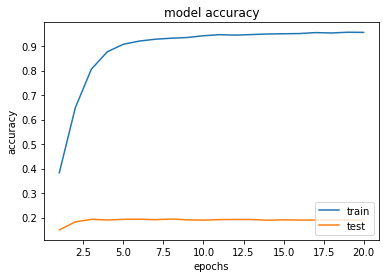

In [7]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [8]:
#Save Model
from keras.models import load_model
model.save("nerual_network.h5")